In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('gapMinder.csv')

In [5]:
df.shape

(127, 71)

In [3]:
df.life_expectancy_years.describe()

count    127.000000
mean      73.867874
std        7.018941
min       58.360000
25%       68.695000
50%       75.490000
75%       79.595000
max       84.030000
Name: life_expectancy_years, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b6f4828>]],
      dtype=object)

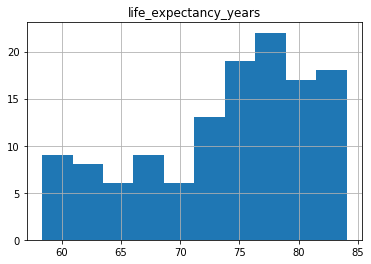

In [4]:
df.hist(column='life_expectancy_years')

In [5]:
# df.insert(0, column='qcut_3', value='default')
qcut_3 = pd.qcut(df.life_expectancy_years, q=3, precision=1)
df.insert(0, column='qcut_3', value=qcut_3)
df.head()

,qcut_3,geo,name,female_industry_workers_percent_of_female_employment,crude_death_rate_deaths_per_1000_population,broadband_subscribers_per_100_people,foreign_direct_investment_net_inflows_percent_of_gdp,female_self_employed_percent_of_female_employment,female_agriculture_workers_percent_of_female_employment,life_expectancy_male,...,males_aged_15_24_employment_rate_percent,females_aged_15_64_labour_force_participation_rate_percent,children_per_woman_total_fertility_with_projections,child_mortality_0_5_year_olds_dying_per_1000_born,cell_phones_per_100_people,cell_phones_total,gnipercapita_ppp_current_international,fixed_line_subscribers_per_100_people,aged_65plus_labour_force_participation_rate_percent,inflation_annual_percent
0,"(58.3, 71.9]",afg,Afghanistan,5.524,6.587,0.04731,0.25649,69.497,73.714,62.764,...,64.350,20.268,4.106,68.248,67.35057,23929713.0,2000,0.33428,22.652,4.87344
1,"(58.3, 71.9]",ago,Angola,1.273,8.372,0.32540,-5.95550,83.705,57.597,58.972,...,46.466,76.285,5.460,83.100,44.73498,13323952.0,6060,0.54079,66.668,31.13638
2,"(77.7, 84.0]",alb,Albania,13.802,7.549,10.02062,7.83883,58.253,46.940,76.543,...,26.863,55.618,1.775,13.273,119.37634,3497950.0,12120,8.42984,8.151,1.37489
3,"(71.9, 77.7]",arg,Argentina,7.823,7.560,17.77736,1.80631,19.694,0.148,72.964,...,35.772,55.340,2.125,10.944,139.81460,61897379.0,20270,21.52728,15.118,25.34918
4,"(71.9, 77.7]",arm,Armenia,7.731,9.686,10.76009,2.16493,44.342,38.965,71.427,...,28.641,57.736,1.743,13.231,119.04397,3488524.0,10060,17.23933,23.836,2.23157


In [7]:
df.qcut_3.value_counts()

(58.3, 71.9]    43
(77.7, 84.0]    42
(71.9, 77.7]    42
Name: qcut_3, dtype: int64

In [276]:
drop_list = list(df.filter(regex='life_expectancy'))
drop_list.extend(['geo', 'name'])
df.drop(drop_list, axis=1, inplace=True)
df.rename(columns={new_column: 'life_expectancy_percentile'}, inplace=True)
df.to_csv('gap-minder-life-expectancy-percentile.csv', index=False)